# Norm approximation on restricted quantized domain
Fast approximation of the norm over the value of a 10bit unsigned int 
using batch gradient descent to minimize the squared error

### Approximation formula:
### $\gamma (x+y) \approx \sqrt{x^2+y^2} \\ x,y \in [0,1023] \subseteq \mathbb{N}$
### where $\gamma = 0.7531854654594905$

import needed modules

In [1]:
#numerical library
import numpy as np
#plot library
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from pprint import pprint

inizialization of the variable

In [2]:
x,y = np.indices([1024,1024])

Guessing the speed gain if this work

In [3]:
%timeit (x**2+y**2)**0.5

10 loops, best of 3: 60.7 ms per loop


In [4]:
%timeit 0.7531854654594905*(x+y)

100 loops, best of 3: 7.32 ms per loop


So if this approximation work we can stimate the norm over x7 time faster
***

hyper parameters initialization

In [5]:
epoch_of_training = 1000
learning_rate = 1e-8
gamma = 1

Initial Error

### Error formula:
### $E = \frac{1}{2}\sum_{1}^{n} (\gamma (x+y)-\sqrt{x^2+y^2})^2$
***

In [6]:
init_sq_err = np.sum(0.5*((gamma*(x+y) - (x**2+y**2)**0.5)**2))
init_sq_err

41735035633.655243

the partial derivative of the error

### Partial derivative formula:
### $\frac{\partial }{\partial \gamma}E =\sum_{1}^{n} (\gamma (x+y)-\sqrt{x^2+y^2})(x+y)$

### The batch grdient descent
### $\gamma^{i} = \gamma^{i-1} - \eta \frac{1}{n}\sum_{1}^{n}\frac{\partial }{\partial \gamma}E_{n}$

In [7]:
for i in range(epoch_of_training):
    gamma -= learning_rate * np.mean((gamma*(x+y)-(x**2+y**2)**0.5)*(x+y))

## Results

In [8]:
gamma

0.7531854654594905

In [9]:
fin_sq_err = np.sum(0.5*((gamma*(x+y) - (x**2+y**2)**0.5)**2))
fin_sq_err

2728739359.0953169

In [10]:
delta_sq_err = init_sq_err - fin_sq_err
delta_sq_err

39006296274.559929

In [11]:
Error = abs(gamma*(x+y) - (x**2+y**2)**0.5)
print(np.max(Error))
print(np.mean(Error))
print(np.min(Error))

252.491268835
55.4540592209
0.0


## Percentual Error Plot

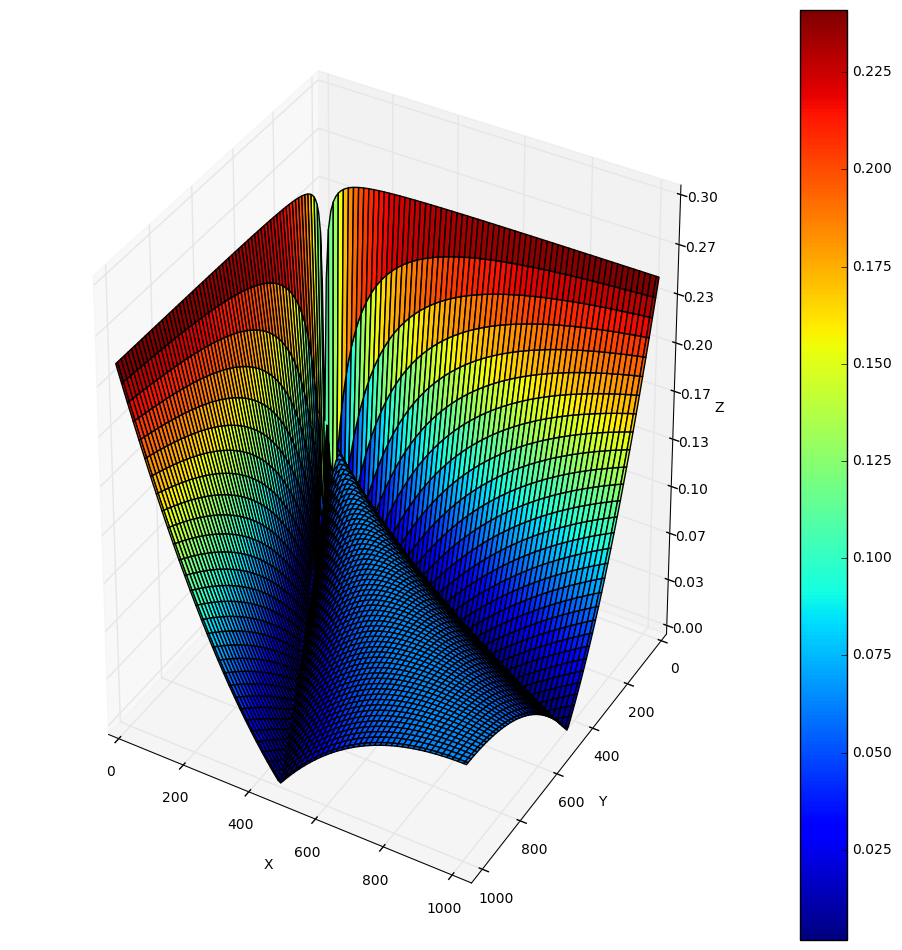

In [12]:
fig = plt.figure(figsize=[12,12])
ax = fig.gca(projection='3d')

X = np.arange(1, 1024, 8)
Y = np.arange(1, 1024, 8)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X**2 + Y**2)
F = abs(gamma*(X+Y)-Z)/(Z)

surf = ax.plot_surface(X, Y, F, rstride=2, cstride=2, cmap=cm.jet,linewidth=1)

ax.set_xlabel('X')
ax.set_xlim(-10, 1034)
ax.set_ylabel('Y')
ax.set_ylim(-10, 1034)
ax.set_zlabel('Z')
ax.set_zlim(0, 0.30)

ax.invert_yaxis()

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf)

plt.show()


# Study of the error

### Along the axis the error is : 
### es $x = 0$ 
### $Error = |\gamma - 1| y$ 
### witch is where there is the biggest relative error
### Along the bisecting rect $y = x$ the error is:
### $Error = | 2\gamma - \sqrt{2} |y$

# 0 Error points:
### $\gamma (x+y) = \sqrt{x^2+y^2}$
### $\gamma^2 (x+y)^2 = x^2+y^2$
### $(\gamma^2-1)x^2 + (\gamma^2-1)y^2 + 2\gamma^2 xy = 0$

### if $\gamma^2 = 1$ then $xy = 0$ so the equality hold on the axis

### else $x^2 + y^2 + 2\frac{\gamma^2}{(\gamma^2-1)} xy = 0$ is a conic

### the charateristic martixs are :
### $B = \begin{pmatrix}1 & \frac{\gamma^2}{\gamma^2 -1}\\ \frac{\gamma^2}{\gamma^2 -1} & 1\end{pmatrix}\\A = \begin{pmatrix} 0 & 0 & 0 \\
0 &
1
 & \frac{\gamma^2}{\gamma^2 -1}\\ 
0 &
\frac{\gamma^2}{\gamma^2 -1} & 
1
\end{pmatrix}$

### $det(A) = 0$ so it's a degenerate conic
### $det(B) = 1 - (\frac{\gamma^2}{\gamma^2-1})^2 = \frac{1-2\gamma^2}{(\gamma^2 -1)^2}$
### $det(B) > 0 \Rightarrow  1-2\gamma^2 > 0 \Rightarrow  \left | \gamma \right | < \frac{1}{\sqrt{2}}$

### so if $\left | \gamma \right | > \frac{1}{\sqrt{2}} \approx 0.707$ the conic is two real distint rect
### else the conic is twoimmaginiary coniugate rect 

### so if they ar real the equation of the rect are:
### $x_{1,2} = -y\frac{\gamma^2}{\gamma^2-1}\pm \sqrt{y^2\frac{\gamma^4}{(\gamma^2-1)^2} - 1}$